In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Regression Analysis: Seasonal Effects with Sklearn Linear Regression
In this notebook, you will build a SKLearn linear regression model to predict Yen futures ("settle") returns with *lagged* Yen futures returns. 

In [4]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()


,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [5]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


# Data Preparation

### Returns

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2014-02-18,9831.0,9865.0,9734.0,9775.0,42.0,9775.0,203495.0,196924.0
2014-02-19,9768.0,9825.0,9760.0,9773.0,2.0,9773.0,129508.0,197197.0
2014-02-20,9774.0,9837.0,9765.0,9775.0,2.0,9775.0,160202.0,198280.0
2014-02-21,9772.0,9776.0,9725.0,9758.0,20.0,9755.0,103091.0,202990.0
2014-02-24,9752.0,9789.0,9740.0,9757.0,2.0,9757.0,90654.0,203114.0


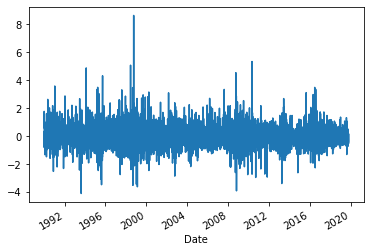

In [6]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = yen_futures.Settle.pct_change()*100
returns.plot()
returns
yen_futures = yen_futures.dropna()
yen_futures.head()

### Lagged Returns 

In [7]:
# Create a lagged return using the shift function
yen_futures ['Returns'] = returns.copy()
yen_futures ['Lagged_Return'] = returns.shift()

yen_futures = yen_futures.dropna()
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Returns,Lagged_Return
Date,,,,,,,,,,
2014-02-18,9831.0,9865.0,9734.0,9775.0,42.0,9775.0,203495.0,196924.0,-0.427829,0.409123
2014-02-19,9768.0,9825.0,9760.0,9773.0,2.0,9773.0,129508.0,197197.0,-0.020460,-0.427829
2014-02-20,9774.0,9837.0,9765.0,9775.0,2.0,9775.0,160202.0,198280.0,0.020465,-0.020460
2014-02-21,9772.0,9776.0,9725.0,9758.0,20.0,9755.0,103091.0,202990.0,-0.204604,0.020465
2014-02-24,9752.0,9789.0,9740.0,9757.0,2.0,9757.0,90654.0,203114.0,0.020502,-0.204604


### Train Test Split

In [8]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = yen_futures[:'2017']
test = yen_futures['2018':]
train
test

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Returns,Lagged_Return
Date,,,,,,,,,,
2018-01-02,8909.5,8957.5,8898.5,8938.0,26.5,8940.5,96714.0,227884.0,0.297285,0.224871
2018-01-03,8943.0,8947.5,8913.0,8921.0,21.5,8919.0,93498.0,226582.0,-0.240479,0.297285
2018-01-04,8917.0,8920.5,8891.0,8901.0,19.0,8900.0,115434.0,224918.0,-0.213028,-0.240479
2018-01-05,8897.0,8902.0,8854.0,8878.0,31.5,8868.5,133023.0,229326.0,-0.353933,-0.213028
2018-01-08,8870.5,8889.0,8849.5,8872.5,5.5,8874.0,81647.0,237100.0,0.062017,-0.353933
...,...,...,...,...,...,...,...,...,...,...
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0,-0.410601,0.170931
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0,-0.369458,-0.410601
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0,-0.564304,-0.369458


In [14]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
# YOUR CODE HERE!
X_train = train["Lagged_Return"].to_frame()
y_train = train["Returns"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Returns"]

In [30]:
X_train

,Lagged_Return
Date,
2014-02-18,0.409123
2014-02-19,-0.427829
2014-02-20,-0.020460
2014-02-21,0.020465
2014-02-24,-0.204604
...,...
2017-12-22,0.084621
2017-12-26,0.118370
2017-12-27,0.118230


# Linear Regression Model

In [28]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
regmodel = LinearRegression()
regmodel.fit(X_train, y_train)

LinearRegression()

# Make predictions using the Testing Data

Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [31]:
# Make a prediction of "y" values using just the test dataset
predictions = regmodel.predict(X_test)
predictions

array([-0.00959876, -0.01003326, -0.00680657, -0.00697128, -0.00612582,
       -0.00862161, -0.01058223, -0.0152206 , -0.00964767, -0.00834913,
       -0.01230077, -0.00386256, -0.00878113, -0.01037416, -0.00606615,
       -0.01186847, -0.01521304, -0.00616156, -0.01234173, -0.00675375,
       -0.00916222, -0.00639426, -0.00648645, -0.00363244, -0.0113184 ,
       -0.01015369, -0.00785676, -0.01109862, -0.00994437, -0.00759945,
       -0.01365068, -0.01166768, -0.01277057, -0.00789942, -0.00283616,
       -0.00538965, -0.01457773, -0.00767439, -0.00722611, -0.00543039,
       -0.01243373, -0.01042302, -0.01219867, -0.00448433, -0.00815397,
       -0.00914115, -0.00716837, -0.00525512, -0.01049052, -0.00684608,
       -0.01016772, -0.00818575, -0.00911003, -0.00809036, -0.01003223,
       -0.01002695, -0.0110344 , -0.01275406, -0.0058733 , -0.00636609,
       -0.00056621, -0.01067369, -0.01142639, -0.00407807, -0.0074221 ,
       -0.00413867, -0.01152233, -0.0085367 , -0.00608047, -0.00

In [22]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
out_of_sample_results = y_test.to_frame()
out_of_sample_results

,Returns
Date,
2018-01-02,0.297285
2018-01-03,-0.240479
2018-01-04,-0.213028
2018-01-05,-0.353933
2018-01-08,0.062017
...,...
2019-10-09,-0.410601
2019-10-10,-0.369458
2019-10-11,-0.564304


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8b5f62e90>,
      dtype=object)

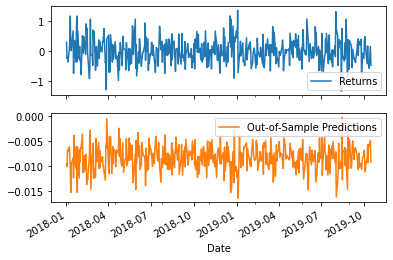

In [25]:
# Plot the first 20 predictions vs the true values
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)
out_of_sample_results.plot(subplots = True)

# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [35]:
from sklearn.metrics import mean_squared_error
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
out_of_sample_mse = mean_squared_error(
    out_of_sample_results["Returns"],
    out_of_sample_results["Out-of-Sample Predictions"])
# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(out_of_sample_mse)

print(f"Out-of-sample Root Mean Squared Error (RMSE); {out_of_sample_rmse}")

Out-of-sample Root Mean Squared Error (RMSE); 0.41545437184712763


# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [14]:
# Construct a dataframe using just the "y" training data:
# YOUR CODE HERE!

# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

In-sample Root Mean Squared Error (RMSE): 0.5658708047560468


# Conclusions

YOUR CONCLUSIONS HERE!